In [7]:
!python create_classifier_dataset.py

Label file not found for 20200812Big.jpg! Skipping...
Label file not found for 3BA6UWRCXXUKURZXGPIE6GFPGM.jpg! Skipping...
Label file not found for fotonoticia_20221128000043_1200.jpg! Skipping...
Label file not found for 5fa5196733570.jpeg! Skipping...
Label file not found for GElPaisI2.jpg! Skipping...
Label file not found for elpaC3ADs.jpg! Skipping...
Label file not found for 20210728Big.jpg! Skipping...
Label file not found for 20200225Big.jpg! Skipping...
Label file not found for elpais.750.jpg! Skipping...
Label file not found for portada-elpais.jpg! Skipping...
Label file not found for hahahaha.jpg! Skipping...
Label file not found for 20210703Big.jpg! Skipping...
Label file not found for elpais.7504.jpg! Skipping...
Label file not found for GElPaisI.jpg! Skipping...
Label file not found for elpais.7502.jpg! Skipping...
Label file not found for portada-de-el-pais-hoy.jpeg! Skipping...
Label file not found for 20200519Big.jpg! Skipping...
Label file not found for GElPaisI3.jpg! 

In [8]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [9]:
data = tf.keras.utils.image_dataset_from_directory("classifier_data") #, batch_size = 8, image_size = (128,128))

Found 74 files belonging to 4 classes.


In [10]:
CLASSES = ["copete", "cuerpo", "epigrafe", "titulo"]

2023-03-17 14:10:12.089899: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 25165824 exceeds 10% of free system memory.
2023-03-17 14:10:12.095210: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 25165824 exceeds 10% of free system memory.


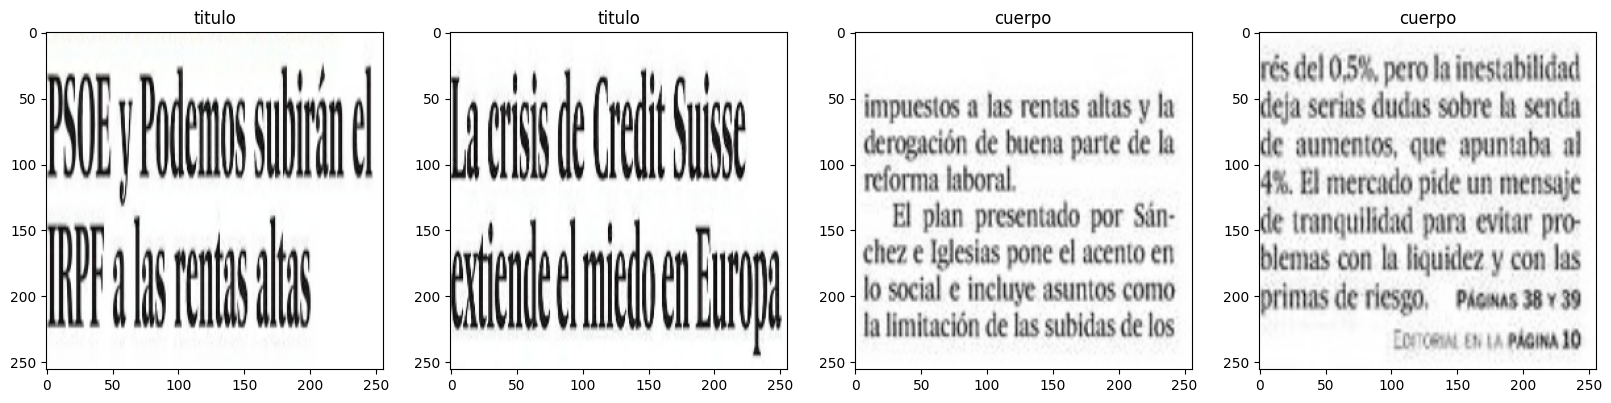

In [12]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    class_ = CLASSES[batch[1][idx]]
    ax[idx].title.set_text(class_)

## Preprocessing

### Scale Data

In [13]:
# Dividimos los valores para que esten entre 0 y 1
scaled_data = data.map(lambda x, y: (x/255, y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [14]:
scaled_data.as_numpy_iterator().next()[0].max()

1.0

### Split Data

In [15]:
# Cantidad de baches
len(scaled_data)

3

In [20]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2) + 1
test_size = int(len(data)*0.1)

print(train_size, "batches for train")
print(val_size, "batches for val")
print(test_size, "batches for test")

train_size + val_size + test_size

2 batches for train
1 batches for val
0 batches for test


3

In [21]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## Deep Model

### Build Model

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [23]:
model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='sigmoid'))

In [24]:
# Por que la linea de arriba funciona y la de abajo rompe?

model.compile("adam", loss = SparseCategoricalCrossentropy() , metrics=["accuracy"])
# model.compile("adam", loss = tf.losses.BinaryCrossentropy(), metrics=["accuracy"])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

### Train

In [26]:
logdir = "logs"

In [27]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [28]:
hist = model.fit(train, epochs = 20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
2/2 [==============================] - 2s 838ms/step - loss: 577.5302 - accuracy: 0.2656 - val_loss: 586.6796 - val_accuracy: 0.2000
Epoch 2/20
2/2 [==============================] - 1s 699ms/step - loss: 1008.5809 - accuracy: 0.2656 - val_loss: 530.4800 - val_accuracy: 0.1000
Epoch 3/20
2/2 [==============================] - 1s 728ms/step - loss: 342.4879 - accuracy: 0.4219 - val_loss: 31.3957 - val_accuracy: 0.7000
Epoch 4/20
2/2 [==============================] - 1s 682ms/step - loss: 81.4780 - accuracy: 0.5625 - val_loss: 6.6325 - val_accuracy: 0.7000
Epoch 5/20
2/2 [==============================] - 1s 678ms/step - loss: 5.3397 - accuracy: 0.5000 - val_loss: 6.6862 - val_accuracy: 0.2000
Epoch 6/20
2/2 [==============================] - 1s 681ms/step - loss: 2.4658 - accuracy: 0.3906 - val_loss: 1.0171 - val_accuracy: 0.6000
Epoch 7/20
2/2 [==============================] - 1s 661ms/step - loss: 0.9483 - accuracy: 0.5781 - val_loss: 0.6778 - val_accuracy: 0.8000
Epoch 8

### Plot performance

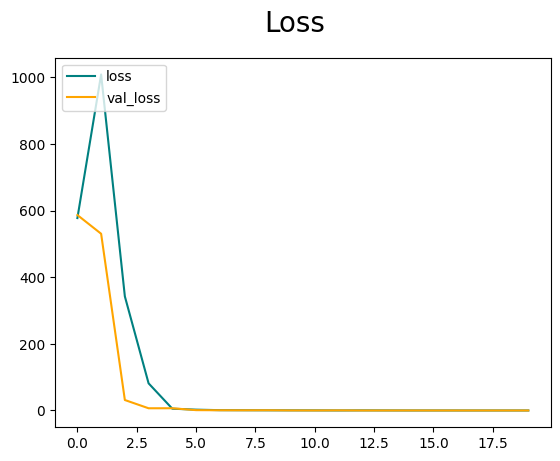

In [29]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

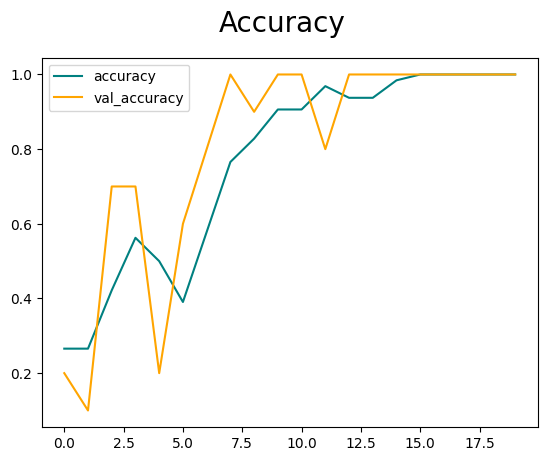

In [30]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Evaluate

## Test

In [87]:
clase = "epigrafe"
image_name = os.listdir(f"classifier_data/{clase}/")[2]
image_path = os.path.join(f"classifier_data/{clase}", image_name)
test_image = cv2.imread(image_path)

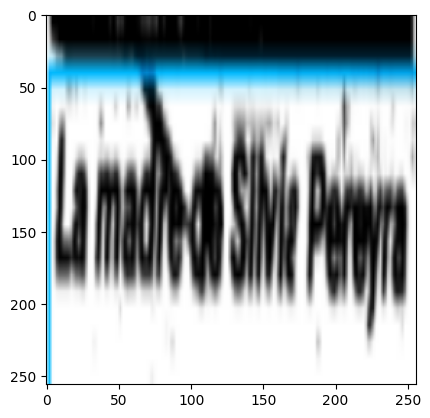

In [88]:
resize = tf.image.resize(test_image, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [89]:
yhat = model.predict(np.expand_dims(resize/255, 0))
prediction = CLASSES[np.argmax(yhat)]
print("La prediccion es", prediction)

1/1 [==============================] - 0s 21ms/step
La prediccion es epigrafe


In [90]:
yhat

array([[0.53568643, 0.51885235, 0.64421624, 0.47008768]], dtype=float32)

## Proximos pasos

- Labelear mas imagenes para tener mas data de entrenamiento
- Tener suficiente data como para armar un set de validacion
- Tunear el modelo
    - Elegir el input size
    - Elegir cantidad de capas
    - Entender las loss functions
- Aplicar data augmentation para tener mas imagenes de cada clase
    - Capaz podemos aumentar mas las imagenes de las clases mas escasas, como los epigrafes

In [46]:
# Creo que vamos a tener que aplicar data augmentation en los epigrafes sobre todo